In [527]:
import hydrofunctions as hf
import pandas as pd
import numpy as np
from zipfile import ZipFile
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("ticks")

In [528]:
river='Grand_R'

In [338]:
WSC_STATIONS = pd.read_pickle('data/WSC_STATIONS')
WSC_FLOWS = pd.read_pickle('data/WSC_FLOWS')
WSC_STATIONS = WSC_STATIONS[WSC_STATIONS.Flow == True]

In [339]:
PWQMN = pd.read_pickle('data/PWQMN')

In [340]:
elem = 'PHOSPHORUS,UNFILTERED TOTAL'
PWQMN = PWQMN[PWQMN["PARM DESCRIPTION"]==elem]
PWQMN.loc[PWQMN.UNITS=='MICROGRAM PER LITER', "RESULT"] = PWQMN.RESULT/1000

In [341]:
PWQMN_LOC = pd.read_excel('../../measurements/PWQMN/PWQMN Locations.xlsx')

In [342]:
GLNI = pd.read_excel('../../measurements/GLNI/Canadian_Tributaries_concentrations_Serghei.xlsx', sheet_name='Data_GLNI_Erie tribs')

In [343]:
elem_name='Phosphorus total'

In [344]:
GLNI = GLNI[GLNI.VariableCommonName==elem_name]

In [345]:
location = (43.012484, -79.884764)

In [346]:
delta = 0.5
near_stations = WSC_STATIONS[(WSC_STATIONS.LATITUDE>location[0]-delta) & (WSC_STATIONS.LATITUDE<location[0]+delta) &
                     (WSC_STATIONS.LONGITUDE>location[1]-delta) & (WSC_STATIONS.LONGITUDE<location[1]+delta)]


In [347]:
Flow_IDS = [[st, False] for st in near_stations.STATION_NUMBER.unique()] 

In [348]:
near_pwqmn_stations = PWQMN_LOC[(PWQMN_LOC.LATITUDE>location[0]-delta) & (PWQMN_LOC.LATITUDE<location[0]+delta) &
                     (PWQMN_LOC.LONGITUDE>location[1]-delta) & (PWQMN_LOC.LONGITUDE<location[1]+delta)]


In [349]:
near_glni_stations = GLNI[(GLNI.Latitude>location[0]-delta) & (GLNI.Latitude<location[0]+delta) &
                     (GLNI.Longitude>location[1]-delta) & (GLNI.Longitude<location[1]+delta)]

In [350]:
near_glni_stations = near_glni_stations[['SiteCode','Latitude','Longitude']]

In [351]:
'Latitude'.upper()

'LATITUDE'

In [352]:
near_glni_stations = near_glni_stations.rename(index=str, columns={'SiteCode':'STATION', 'Latitude':'Latitude'.upper(), 'Longitude':'Longitude'.upper()})


In [353]:
PWQMN_IDS = [[st, False] for st in set(PWQMN.STATION.unique()).intersection(near_pwqmn_stations.STATION.unique())]

In [354]:
all_near_stations = pd.DataFrame({'STATION':[], 'LONGITUDE':[], 'LATITUDE':[]})

In [355]:
near_stations = near_stations[['STATION_NUMBER', 'LONGITUDE', 'LATITUDE']]

In [356]:
near_stations = near_stations.rename(index=str, columns={'STATION_NUMBER':'STATION'})


In [357]:
near_pwqmn_stations = near_pwqmn_stations[['STATION', 'LONGITUDE', 'LATITUDE']]

In [358]:
all_near_stations = pd.concat([near_stations, near_pwqmn_stations, near_glni_stations])

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [359]:
Show_IDS = [[st, False] for st in all_near_stations.STATION.unique()] 

In [492]:
import folium
# import folium.plugins as plugins
from folium.plugins import MiniMap
from folium.plugins.beautify_icon import BeautifyIcon
from folium.features import DivIcon



# m = folium.Map(width=500,height=300, location=location, zoom_start=11.,tiles="OpenStreetMap", attr='Global Water Futures')
m = folium.Map(width=700,height=500, 
                location=location,
               control_scale = True,
                 zoom_start=9.5,
               zoom_control=False,
                 tiles='https://tile.thunderforest.com/outdoors/{z}/{x}/{y}.png?apikey=34dad269f6ab438c9534def56b86fa5f',
                 API_key='34dad269f6ab438c9534def56b86fa5f',
                attr='Global Water Futures')

# show all Flow
# for index, st_dic in enumerate(Flow_IDS):
#     st = st_dic[0]
# #     N = df[df.MonitoringLocationIdentifier==st].shape[0]
# #     if N>10:
#     st_df = near_stations[near_stations.STATION == st]
#     folium.Marker(location=[st_df.LATITUDE.values[0], 
#                             st_df.LONGITUDE.values[0]], 
#                               popup=folium.Popup(html=st_df.STATION.values[0],
#                             show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='gray')
#                  ).add_to(m)

# show all
# for index, st_dic in enumerate(Show_IDS):
#     st = st_dic[0]
# # #     N = df[df.MonitoringLocationIdentifier==st].shape[0]
# # #     if N>10:
#     st_df = all_near_stations[all_near_stations.STATION == st]
#     folium.Marker(location=[st_df.LATITUDE.values[0], 
#                             st_df.LONGITUDE.values[0]], 
#                               popup=folium.Popup(html=str(st_df.STATION.values[0]),
#                             show=False, max_width=10), icon=folium.Icon(icon='arrow-down', color='gray')
#                  ).add_to(m)




Show_IDS = [
[16018403502, True],
[16018409202, True],
["ON02GC1600", True],
[16018412802, False],
[16018402402, False],
[16018402702, False],
["02GB001", True],
]



for index, st_dic in enumerate(Show_IDS):
    st = st_dic[0]
    print(st)
    if st_dic[1]:
        clr='#f44242'
    else:
        clr='#0b15c4'
    st_df = all_near_stations[all_near_stations.STATION == st]
    folium.CircleMarker(location=[st_df.LATITUDE.values[0], 
                            st_df.LONGITUDE.values[0]], radius=23, 
                        fill=True, fill_color='white',
                            color = clr,fill_opacity=1,
                       weight=5).add_to(m)
    if not index+1 in [2,5]:
        folium.map.Marker(
        location=[st_df.LATITUDE.values[0]+0.0235,st_df.LONGITUDE.values[0]-0.1026], # 10 km
#         location=[st_df.LATITUDE.values[0]+0.0135,st_df.LONGITUDE.values[0]-0.0526], # 5km
#         location=[st_df.LATITUDE.values[0]+0.0065,st_df.LONGITUDE.values[0]-0.026], # 2km
        icon=DivIcon(
            icon_size=(150,36),
            icon_anchor=(0,0),
            html='<div style="font-size: 24pt;text-align: center;vertical-align: middle">{}</div>'.format(index+1),
            )
        ).add_to(m)




m



# 16018403502
# 16018409202
# 16018412802
# 16018402402
# 16018402702

16018403502
16018409202
ON02GC1600
16018412802
16018402402
16018402702
02GB001


In [493]:
selected_stations = [s[0] for s in Show_IDS]

In [494]:
TP_1 = PWQMN[PWQMN.STATION.isin(selected_stations)][['DATE', 'RESULT','STATION']]
TP_1['RESULT'] = pd.to_numeric(TP_1['RESULT'])
TP_1['RESULT'] = TP_1['RESULT']*(TP_1['RESULT']<20)

In [495]:
TP_2 = GLNI[GLNI.SiteCode.isin(selected_stations)] # [['DATE', 'RESULT','STATION']]
TP_2 = TP_2[['SampleDateTime', 'Value', 'SiteCode']]
TP_2 = TP_2.rename(index=str, columns={'SampleDateTime':'DATE', 'Value':'RESULT', 'SiteCode':'STATION'})

In [496]:
TP = pd.concat([TP_1, TP_2])


In [497]:
TP['RESULT'] = pd.to_numeric(TP['RESULT'])

In [498]:
pt = sns.color_palette("colorblind", len(selected_stations))

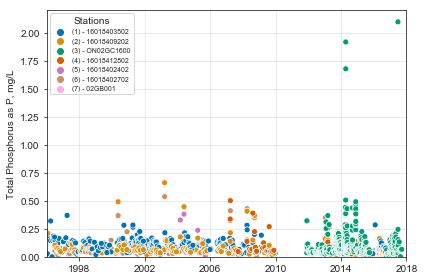

In [500]:
## fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

ax = sns.scatterplot(x='DATE', y='RESULT', data=TP, hue_order=selected_stations, hue='STATION', palette=pt, markers=True)
leg = ["({}) - {}".format(i+1,st) for i, st in enumerate(selected_stations)]

leg_handles = ax.get_legend_handles_labels()[0]
ax.legend(leg_handles[1:], leg, title='Stations', fontsize='x-small', loc='best')

# ax.legend(['(1) - HTLP (NCWQR)'], title='Stations', fontsize='x-small', loc=2)

plt.ylim(0,None)
plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Total Phosphorus as P, mg/L")
plt.xlabel("")
plt.tight_layout()
plt.savefig('One_by_one/Canada/'+river+'/'+river+'_TP.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/Canada/'+river+'/'+river+'_TP.pdf')



In [501]:
print(TP.groupby('STATION')["RESULT"].describe().reindex(selected_stations).round(2).to_latex())
      

\begin{tabular}{lrrrrrrrr}
\toprule
{} &  count &  mean &   std &   min &   25\% &   50\% &   75\% &   max \\
STATION     &        &       &       &       &       &       &       &       \\
\midrule
16018403502 &  314.0 &  0.10 &  0.06 &  0.00 &  0.06 &  0.10 &  0.14 &  0.37 \\
16018409202 &  155.0 &  0.08 &  0.09 &  0.01 &  0.04 &  0.06 &  0.08 &  0.66 \\
ON02GC1600  &  447.0 &  0.11 &  0.17 &  0.00 &  0.05 &  0.07 &  0.13 &  2.10 \\
16018412802 &   61.0 &  0.09 &  0.09 &  0.02 &  0.05 &  0.06 &  0.08 &  0.50 \\
16018402402 &   32.0 &  0.08 &  0.08 &  0.01 &  0.04 &  0.05 &  0.07 &  0.38 \\
16018402702 &  137.0 &  0.08 &  0.10 &  0.01 &  0.02 &  0.04 &  0.08 &  0.54 \\
02GB001     &    NaN &   NaN &   NaN &   NaN &   NaN &   NaN &   NaN &   NaN \\
\bottomrule
\end{tabular}



In [502]:
selected_stations

[16018403502,
 16018409202,
 'ON02GC1600',
 16018412802,
 16018402402,
 16018402702,
 '02GB001']

In [503]:
master_stations = [st[0] for st in Show_IDS if st[1]]
# master_stations = selected_stations
master_st_df = TP[TP.STATION.isin(master_stations)]
master_st_df['USGSPCode'] = 0
master_st_df.shape

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(916, 4)

In [504]:
master_st_df.DATE = master_st_df.DATE.dt.date
# = pd.to_date(master_st_df.DATE, format="%Y-%m-%d")
# master_st_df

In [505]:
master_st_df[[
    'DATE','USGSPCode', 'RESULT']].groupby('DATE').mean().reset_index().sort_values('DATE').to_csv(
    'One_by_one/Canada/'+river+'/TP_'+river+'iver_data.csv', index=False)

### Discharge

In [506]:
river

'Grand_R'

In [507]:
site = '02GB001'
discharge = WSC_FLOWS[WSC_FLOWS.index>datetime.datetime(1996,1,1)][site].to_frame()

In [508]:
discharge = discharge.reset_index()
discharge = discharge.rename(index=str, columns={site:'Discharge, cms', 'index':'Date'})
discharge['Source'] = site

In [509]:
discharge['Flow, CFS'] = discharge['Discharge, cms']/0.028

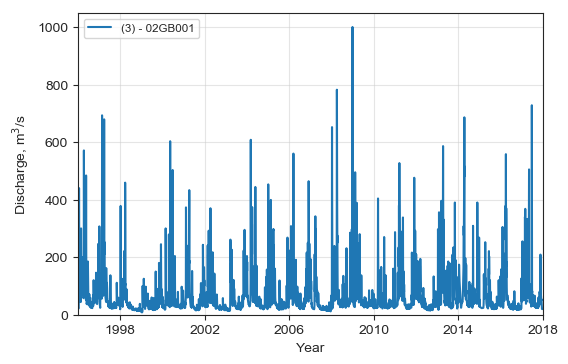

In [379]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
ax=sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source',ax=ax)

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes


ax.legend(['(3) - '+site], loc=2, fontsize='small')
ax.set_ylim(0,None)
ax.set_xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
ax.grid(alpha=0.5)
ax.set_ylabel("Discharge, m$^3$/s")
ax.set_xlabel("Year")

# axins = zoomed_inset_axes(ax, 8, loc='upper center')
# sns.lineplot(x='Date', y='Discharge, cms', data=discharge, hue='Source', ax=axins,zorder=10)
# axins.set_xlim(datetime.datetime(2010,4,1), datetime.datetime(2010,6,1)) # apply the x-limits
# axins.set_ylim(0, 10) # apply the y-limits
# plt.yticks(visible=False)
# plt.xticks(visible=False)
# from mpl_toolkits.axes_grid1.inset_locator import mark_inset
# mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")

plt.savefig('One_by_one/Canada/'+river+'/'+river+'_Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/Canada/'+river+'/'+river+'_Q.pdf')

In [380]:
discharge[['Date', 'Flow, CFS']].to_csv('One_by_one/Canada/'+river+'/Flow_'+river+'_CFS.csv', index=False)

### Egret

In [381]:
river

'Grand_R'

In [510]:

EGRET_Daily = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings Canada 2/One_by_one/Canada/'+river+'/EGRET Result/TP/'+river+'iver_TP_Daily.csv')
EGRET_Sample = pd.read_csv('/Users/imarkelo/git/Great-Lakes-Data/post_proc_scripts/Loadings Canada 2/One_by_one/Canada/'+river+'/EGRET Result/TP/'+river+'iver_TP_Sample.csv')


In [511]:
EGRET_Sample['Fx_Hat'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcHat']/1000/1000
EGRET_Sample['Fx_C'] = EGRET_Sample['Q']*60*60*24*1000 * EGRET_Sample['ConcAve']/1000/1000


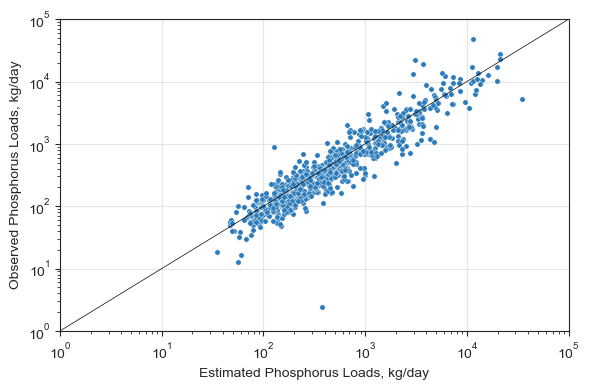

In [512]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)
sns.scatterplot(y='Fx_C', 
                x='Fx_Hat',
                data=EGRET_Sample,
                s=15,
                linewidth=0.3, ax=ax,
               color=sns.color_palette("Blues")[4])
# plt.legend("")
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot([-100,1000000],[-100,1000000], 'k', lw=0.5)
plt.xlim(1,100000)
plt.ylim(1,100000)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.xlabel("Estimated Phosphorus Loads, kg/day")
plt.ylabel("Observed Phosphorus Loads, kg/day")
# plt.xlabel("")
plt.tight_layout()
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/Canada/'+river+'/'+river+'_FvsF.pdf')


In [513]:
EGRET_Daily['FluxYearMTA'] = EGRET_Daily['FluxDay']*365/1000
EGRET_Daily['Fx_SE'] = (np.exp(EGRET_Daily['SE']+EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000-np.exp(EGRET_Daily['yHat']) * EGRET_Daily['Q']*60*60*24*1000/1000/1000/1000)*365
EGRET_Daily_an = EGRET_Daily.groupby('waterYear').mean().reset_index()


In [514]:
EGRET_Daily_an

,waterYear,Unnamed: 0,Q,Julian,Month,Day,DecYear,MonthSeq,i,LogQ,Q7,Q30,yHat,SE,ConcDay,FluxDay,FNConc,FNFlux,FluxYearMTA,Fx_SE
0,1996,137.0,90.633912,53462.0,5.021978,138.000000,1996.375797,1757.021978,137.0,4.203229,91.338712,93.772060,-2.268653,0.424076,0.125121,1364.238646,0.108362,910.378011,497.947106,263.123091
1,1997,456.0,81.481587,53781.0,6.526027,183.838356,1997.248146,1767.501370,456.0,4.086165,82.044243,82.698435,-2.393623,0.420367,0.107551,1041.276269,0.098413,764.633711,380.065838,200.803454
2,1998,821.0,49.875609,54146.0,6.526027,183.838356,1998.248059,1779.501370,821.0,3.613392,49.936644,50.298154,-2.536484,0.404788,0.091253,487.784311,0.098722,756.261260,178.041274,89.622469
3,1999,1186.0,28.873153,54511.0,6.526027,183.838356,1999.248059,1791.501370,1186.0,3.210778,28.673463,28.305560,-2.672552,0.395310,0.080266,209.946998,0.098954,748.246532,76.630654,34.703150
4,2000,1551.5,64.340970,54876.5,6.513661,183.500000,2000.248661,1803.497268,1551.5,3.881726,64.361220,63.936692,-2.507417,0.406140,0.099485,836.719536,0.099157,741.624801,305.402631,157.595273
5,2001,1917.0,56.010279,55242.0,6.526027,183.838356,2001.248146,1815.501370,1917.0,3.682669,56.147549,56.778888,-2.482834,0.398778,0.096774,600.293339,0.098962,727.705761,219.107069,107.616486
6,2002,2282.0,60.239242,55607.0,6.526027,183.838356,2002.248059,1827.501370,2282.0,3.860808,60.233423,60.228722,-2.458980,0.390344,0.097987,583.418599,0.098767,712.458944,212.947789,98.170350
7,2003,2647.0,37.935431,55972.0,6.526027,183.838356,2003.248059,1839.501370,2647.0,3.369842,37.848588,37.737832,-2.623787,0.382572,0.086492,364.068996,0.098559,704.800644,132.885184,59.344775
8,2004,3012.5,74.597814,56337.5,6.513661,183.500000,2004.248661,1851.497268,3012.5,4.031022,74.719314,74.792055,-2.411088,0.385534,0.102607,824.507381,0.097220,707.541269,300.945194,138.736609
9,2005,3378.0,58.804004,56703.0,6.526027,183.838356,2005.248146,1863.501370,3378.0,3.714674,58.644015,58.634196,-2.546835,0.387896,0.089645,588.902396,0.093984,700.481529,214.949375,97.841902


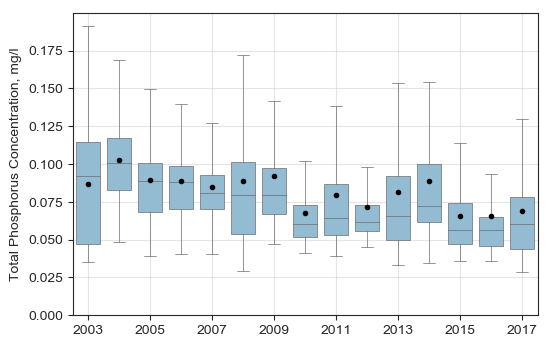

In [523]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

# sns.boxplot(EGRET_Daily['waterYear'], EGRET_Daily['ConcDay'], color=sns.color_palette()[0])

# plt.fill_between(EGRET_Daily_an['waterYear'][5:-1],
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]-EGRET_Daily_an['SE'][5:-1]),
#                  np.exp(EGRET_Daily_an['yHat'][5:-1]+EGRET_Daily_an['SE'][5:-1]), 
#                  color=sns.color_palette()[0], alpha=0.15)
# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

meanpointprops = dict(marker='.', markeredgecolor='black', markersize=6,markerfacecolor='black')
ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", 
                 data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2],
                order=range(2003,2018))

# ax = sns.boxplot(showmeans=True, linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="ConcDay", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
# plt.xlim(2003,2018)
# plt.xlim(6.5, 18.5)
locs, labels = plt.xticks() 
plt.xticks(locs[::2], labels[::2])
plt.ylim(0,None)
# plt.vlines(4.5, 0, 0.6, 'k', '-.', lw=0.7)
# plt.vlines(9.5, 0, 0.6, 'k', '-.', lw=0.7)

# ax.set_xticks([int(x) for x in np.linspace(2003,2017, 8)])

plt.grid(alpha=0.5)
plt.ylabel("Total Phosphorus Concentration, mg/l")
plt.xlabel("")
# fig.autofmt_xdate()
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/Canada/'+river+'/'+river+'_PC.pdf')




In [516]:
EGRET_Daily.groupby('waterYear').mean()

,Unnamed: 0,Q,Julian,Month,Day,DecYear,MonthSeq,i,LogQ,Q7,Q30,yHat,SE,ConcDay,FluxDay,FNConc,FNFlux,FluxYearMTA,Fx_SE
waterYear,,,,,,,,,,,,,,,,,,,
1996,137.0,90.633912,53462.0,5.021978,138.000000,1996.375797,1757.021978,137.0,4.203229,91.338712,93.772060,-2.268653,0.424076,0.125121,1364.238646,0.108362,910.378011,497.947106,263.123091
1997,456.0,81.481587,53781.0,6.526027,183.838356,1997.248146,1767.501370,456.0,4.086165,82.044243,82.698435,-2.393623,0.420367,0.107551,1041.276269,0.098413,764.633711,380.065838,200.803454
1998,821.0,49.875609,54146.0,6.526027,183.838356,1998.248059,1779.501370,821.0,3.613392,49.936644,50.298154,-2.536484,0.404788,0.091253,487.784311,0.098722,756.261260,178.041274,89.622469
1999,1186.0,28.873153,54511.0,6.526027,183.838356,1999.248059,1791.501370,1186.0,3.210778,28.673463,28.305560,-2.672552,0.395310,0.080266,209.946998,0.098954,748.246532,76.630654,34.703150
2000,1551.5,64.340970,54876.5,6.513661,183.500000,2000.248661,1803.497268,1551.5,3.881726,64.361220,63.936692,-2.507417,0.406140,0.099485,836.719536,0.099157,741.624801,305.402631,157.595273
2001,1917.0,56.010279,55242.0,6.526027,183.838356,2001.248146,1815.501370,1917.0,3.682669,56.147549,56.778888,-2.482834,0.398778,0.096774,600.293339,0.098962,727.705761,219.107069,107.616486
2002,2282.0,60.239242,55607.0,6.526027,183.838356,2002.248059,1827.501370,2282.0,3.860808,60.233423,60.228722,-2.458980,0.390344,0.097987,583.418599,0.098767,712.458944,212.947789,98.170350
2003,2647.0,37.935431,55972.0,6.526027,183.838356,2003.248059,1839.501370,2647.0,3.369842,37.848588,37.737832,-2.623787,0.382572,0.086492,364.068996,0.098559,704.800644,132.885184,59.344775
2004,3012.5,74.597814,56337.5,6.513661,183.500000,2004.248661,1851.497268,3012.5,4.031022,74.719314,74.792055,-2.411088,0.385534,0.102607,824.507381,0.097220,707.541269,300.945194,138.736609


In [517]:
EGRET_Daily_an['Fx_AE'] = (abs(EGRET_Sample['Fx_Hat'] - EGRET_Sample['Fx_C'])/EGRET_Sample['Fx_C']).mean()*EGRET_Daily_an['FluxYearMTA']




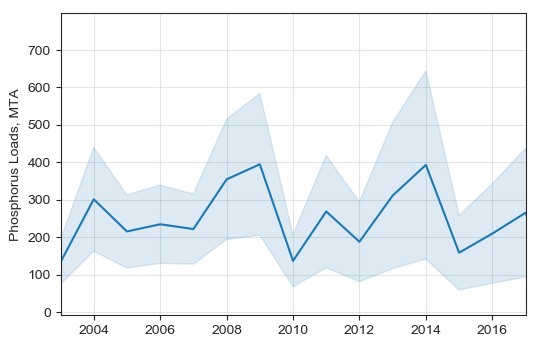

In [525]:
fig,ax=plt.subplots(1,1,figsize=(6,4), dpi=100)

k=None
plt.plot(EGRET_Daily_an['waterYear'][:k], EGRET_Daily_an['FluxYearMTA'][:k], c=sns.color_palette()[0])

# s=12
# plt.plot(EGRET_Daily_an['waterYear'][s:], EGRET_Daily_an['FluxYearMTA'][s:], c=sns.color_palette()[0])

plt.fill_between(EGRET_Daily_an['waterYear'][:k],
                 EGRET_Daily_an['FluxYearMTA'][:k]-EGRET_Daily_an['Fx_SE'][:k],
                 EGRET_Daily_an['FluxYearMTA'][:k]+EGRET_Daily_an['Fx_SE'][:k], 
                 color=sns.color_palette()[0], alpha=0.15)

# plt.fill_between(EGRET_Daily_an['waterYear'][s:],
#                  EGRET_Daily_an['FluxYearMTA'][s:]-EGRET_Daily_an['Fx_SE'][s:],
#                  EGRET_Daily_an['FluxYearMTA'][s:]+EGRET_Daily_an['Fx_SE'][s:], 
#                  color=sns.color_palette()[0], alpha=0.15)



# plt.vlines(2007, 0, 200, 'k', '-.', lw=0.7)
# plt.vlines(2013, 0, 200, 'k', '-.', lw=0.7)


# plt.plot(EGRET_Daily_an['waterYear'][5:-1], EGRET_Daily_an['FluxYearMTA'][5:-1])

# sns.scatterplot(x="waterYear", y="FluxYearMTA",
#                 sizes=(1, 8), linewidth=0.3,
#                 data=EGRET_Daily_an, ax=ax)

# meanpointprops = dict(marker='D', markeredgecolor='black', markersize=1,markerfacecolor=sns.color_palette()[3])
# ax = sns.boxplot(linewidth=0.5, meanprops=meanpointprops, x="waterYear", y="FluxYearMTA", data=EGRET_Daily, showfliers=False, color=sns.color_palette("Blues")[2])
# ax.set_yscale('log')
# plt.legend("")
# plt.plot([-100,100],[-100,100], 'k', lw=0.5)
plt.xlim(2003,2017)
# plt.xticks([int(x) for x in np.linspace(5,19,8)], [int(x) for x in np.linspace(2003,2017, 8)])
# plt.ylim(0,200)
# plt.xlim(datetime.datetime(1996,1,1), datetime.datetime(2018,1,1))
plt.grid(alpha=0.5)
plt.ylabel("Phosphorus Loads, MTA")
plt.xlabel("")
# plt.savefig('One_by_one/Western/US/Portage R/Portage Q.pdf')
plt.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Rivers_tables/img/Western/Canada/'+river+'/'+river+'_PFlux.pdf')


In [526]:
print(EGRET_Daily_an[(EGRET_Daily_an.waterYear<2019) & (EGRET_Daily_an.waterYear>2002)][['waterYear', 'FluxYearMTA','Fx_SE']].round(1).T.to_latex(index=False))

\begin{tabular}{rrrrrrrrrrrrrrrr}
\toprule
     7  &      8  &      9  &      10 &      11 &      12 &      13 &      14 &      15 &      16 &      17 &      18 &      19 &      20 &      21 &      22 \\
\midrule
 2003.0 &  2004.0 &  2005.0 &  2006.0 &  2007.0 &  2008.0 &  2009.0 &  2010.0 &  2011.0 &  2012.0 &  2013.0 &  2014.0 &  2015.0 &  2016.0 &  2017.0 &  2018.0 \\
  132.9 &   300.9 &   214.9 &   234.2 &   221.4 &   354.2 &   394.3 &   136.4 &   268.3 &   187.5 &   310.9 &   392.7 &   158.2 &   209.3 &   264.9 &    75.0 \\
   59.3 &   138.7 &    97.8 &   104.5 &    93.8 &   160.5 &   189.3 &    69.5 &   150.0 &   106.6 &   195.2 &   251.2 &    99.5 &   133.0 &   171.5 &    47.3 \\
\bottomrule
\end{tabular}



In [520]:
EGRET_Daily.groupby(['waterYear'])['FluxYearMTA'].describe()

,count,mean,std,min,25%,50%,75%,max
waterYear,,,,,,,,
1996,273.0,497.947106,1021.991330,28.014937,118.792209,192.855974,396.853473,10094.645902
1997,365.0,380.065838,954.525926,31.498123,101.730622,146.158391,277.233199,11729.607194
1998,365.0,178.041274,430.417640,24.462991,62.136191,78.318357,115.457531,5164.366611
1999,365.0,76.630654,62.607558,7.747777,34.538225,67.619247,89.981211,586.560644
2000,366.0,305.402631,862.241165,22.604256,73.745110,112.102794,222.402877,11300.564374
2001,365.0,219.107069,455.090034,33.971064,61.779022,80.708669,184.123108,4599.562918
2002,365.0,212.947789,306.909617,37.250501,81.279534,117.541668,218.075053,3299.610668
2003,365.0,132.885184,227.067945,15.088993,32.839562,72.093976,127.529663,1542.722745
2004,366.0,300.945194,561.892038,44.589339,92.780898,146.549861,247.032375,4996.267055
